# Нелинейная регрессия (Non-linear regression) / Полиномиальная регрессия (Polynomial regression)

---

**Источники:**


[How to Use Polynomial Feature Transforms for Machine Learning](https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/)

---

## Подготовка окружения

In [ ]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [ ]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

In [7]:
import sklearn

sklearn.__version__

'0.24.1'

## Загрузка данных

[Источник (FuelConsumption)](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

In [8]:
df = pd.read_csv("./../../data/FuelConsumptionCo2.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


## Полиномиальная регрессия (Polynomial regression)

**Геометрически определяет кривую, наиболее близко проходящую ко всем точкам.**

![linear_nonlinear.jpg](images/linear_nonlinear.jpg)

Примеры полинома:

$y = a x^3 + b x^2 + c x + d$

$y = b + \theta_1  x + \theta_2 x^2$




Нелинейные функции может быть
- экспоненциальные (exponential)
- логарифмические (logarithms)
- рациональные / дробные (rational / fraction)
- и другие.

Например: 

$y = \log(x)$

$y = \log(a x^3 + b x^2 + c x + d)$


## Примеры полиномиальных функций

### Линейная функция (Linear function)

$y = kX + b$

Text(0.5, 0, 'Independent Variable')

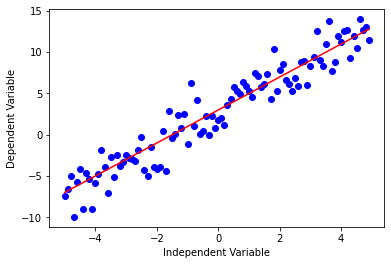

In [9]:
x = np.arange(-5.0, 5.0, 0.1)

y = 2 * x + 3
y_noise = 2 * np.random.normal(size=x.size)
y_data = y + y_noise

plt.plot(x, y_data,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')

### Квадратичная функция (Quadratic function)
$y = k_{2}X^2 + k_{1}X + b$

Text(0.5, 0, 'Independent Variable')

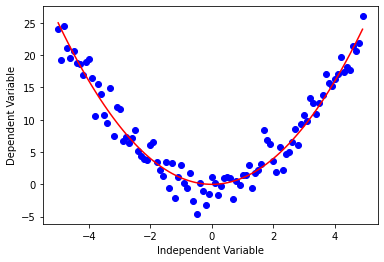

In [10]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
y_data = y + y_noise
plt.plot(x, y_data,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')

### Кубическая функция (Cubic function)

$y = k_{1}X^3 + k_{2}X^2 + k_{3}X + b$

Text(0.5, 0, 'Independent Variable')

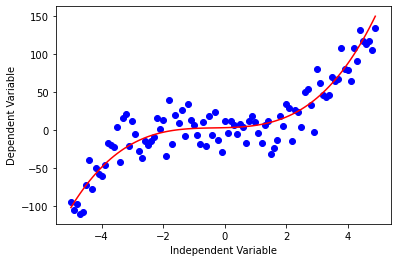

In [11]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
y_data = y + y_noise
plt.plot(x, y_data,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')

### Экспоненциальная функция (Exponential function)

$Y = a + b c^X$ где b ≠0, c > 0 , c ≠1, и x - любое вещественное число.
c - константа
x - переменная

Text(0.5, 0, 'Independent Variable')

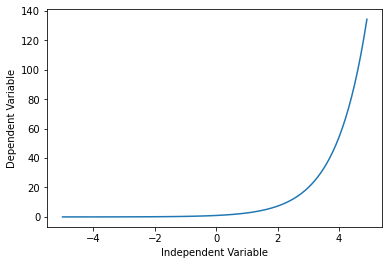

In [12]:
X = np.arange(-5.0, 5.0, 0.1)

y = np.exp(X)

plt.plot(X,y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')

### Логарифмическая функция (Logarithmic function)

$y = \log(x)$

Вместо $x$ можно использовать $X$, которое является полиномиальным представлением $x$-в.

$y = \log(X)$


Text(0.5, 0, 'Independent Variable')

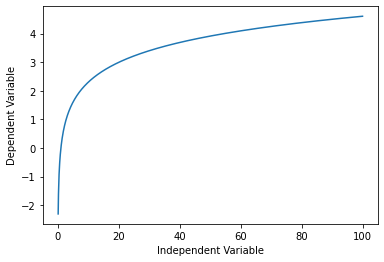

In [13]:
X = np.arange(0.1, 100.0, 0.1)

y = np.log(X)

plt.plot(X,y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')

### Сигмоида / Логистическое уравнение (Sigmoid/Logistic function)
$$ y = a + \frac{b}{1+ c^{(X-d)}}$$

Text(0.5, 0, 'Independent Variable')

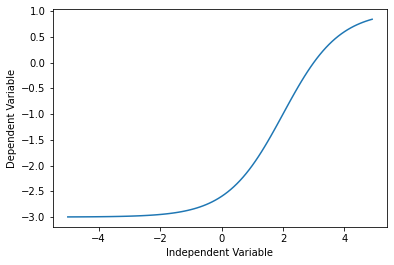

In [14]:
X = np.arange(-5.0, 5.0, 0.1)


y = 1-4/(1+np.power(3, X-2))

plt.plot(X,y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')

---

## Квадратичная функция (Quadratic function)

Класс [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) генерирует новую матрицу признаков, состоящую из всех полиномиальных комбинаций признаков со степенью меньше или равной указанной степени.

Например, если входная выборка двумерная и имеет форму $\large [a, b]$, полиномиальные признаки степени 2 будут $\large [1, a, b, a ^ 2, ab, b ^ 2]$.

## Обучение модели (Train)

In [15]:
# разделить независимую и зависимую переменные / train и test
from sklearn.model_selection import train_test_split

y = df['CO2EMISSIONS'].copy()
X = df[['ENGINESIZE']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_train_poly

array([[ 1.  ,  1.6 ,  2.56],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  2.5 ,  6.25],
       ...,
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  1.8 ,  3.24],
       [ 1.  ,  5.6 , 31.36]])

**fit_transform** принимает x, и возвращает список с данными в степени от 0 до 2 (так как `PolynomialFeatures(degree=2)`).
 

$$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$$

$$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$$


Полиномиальную регрессию можно считать особым случаем линейной регрессии, так как можно заменить $x$ на $x_1$, $x_1^2$ на $x_2$, и так далее.
Таким образом полином второй степени будет выглядеть так

$y = b + \theta_1  x_1 + \theta_2 x_2$

И теперь можно решать эту задачу аналогично обычной линейной регрессии.

In [17]:
poly_regr = linear_model.LinearRegression()
poly_regr.fit(X_train_poly, y_train)

print('Coefficients: ', poly_regr.coef_)
print('Intercept: ', poly_regr.intercept_)

Coefficients:  [ 0.         46.48789445 -0.97823511]
Intercept:  114.40990923177623


## Оценка качества модели (Evaluation)

In [18]:
from sklearn.metrics import r2_score

X_test_poly = poly.transform(X_test)
y_predicted = poly_regr.predict(X_test_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_predicted - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_predicted - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_true=y_test, y_pred=y_predicted))

Mean absolute error: 23.36
Residual sum of squares (MSE): 939.43
R2-score: 0.77


## Визуализация результата обучения модели

Text(0, 0.5, 'Emission')

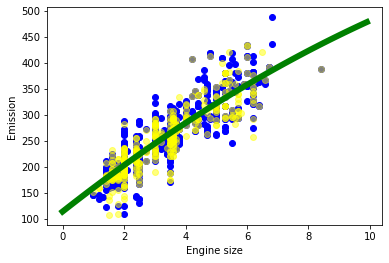

In [19]:
plt.scatter(X_train, y_train,  color='blue')
plt.scatter(X_test, y_test,  color='yellow', alpha=0.5)

XX = np.arange(0.0, 10.0, 0.1)
yy = poly_regr.intercept_+ poly_regr.coef_[1]*XX+ poly_regr.coef_[2]*np.power(XX, 2)

plt.plot(XX, yy, '-g', linewidth=6)

plt.xlabel("Engine size")
plt.ylabel("Emission")

---

## Кубическая функция (Cubic function)

In [20]:
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
cubic_regr = linear_model.LinearRegression()
y3_train = cubic_regr.fit(X_train_poly3, y_train)

print ('Coefficients: ', cubic_regr.coef_)
print ('Intercept: ',cubic_regr.intercept_)

Coefficients:  [ 0.         26.97789231  4.45249857 -0.45554355]
Intercept:  134.97352314110242


## Оценка качества модели (Evaluation)

In [21]:
test_x_poly3 = poly3.fit_transform(X_test)
y3_predicted = cubic_regr.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y3_predicted - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y3_predicted - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_true=y_test, y_pred=y3_predicted))

Mean absolute error: 23.35
Residual sum of squares (MSE): 933.47
R2-score: 0.77


## Визуализация результата обучения модели

Text(0, 0.5, 'Emission')

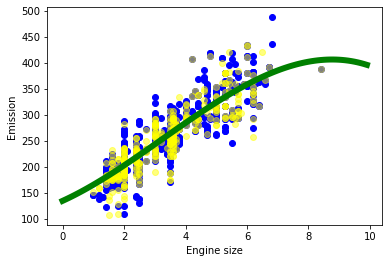

In [22]:
plt.scatter(X_train, y_train,  color='blue')
plt.scatter(X_test, y_test,  color='yellow', alpha=0.5)

XX = np.arange(0.0, 10.0, 0.1)
yy = cubic_regr.intercept_+ cubic_regr.coef_[1]*XX + cubic_regr.coef_[2]*np.power(XX, 2) + cubic_regr.coef_[3]*np.power(XX, 3)

plt.plot(XX, yy, '-g', linewidth=6)

plt.xlabel("Engine size")
plt.ylabel("Emission")